In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('JEE_Rank_2016_2024.csv')
data.head()


,Institute,Quota,Gender,Year,Academic_Program_Name,Closing_Rank,Opening_Rank,Seat_Type
0,Indian Institute of Technology Bhubaneswar,AI,Gender-Neutral,2016,"Mechanical Engineering (4 Years, Bachelor of T...",651,583,ST
1,Indian Institute of Technology Bombay,AI,Gender-Neutral,2016,"Civil Engineering (4 Years, Bachelor of Techno...",21,21,OBC-NCL (PwD)
2,Indian Institute of Technology Bombay,AI,Gender-Neutral,2016,"Computer Science and Engineering (4 Years, Bac...",60,1,OPEN
3,Indian Institute of Technology Bombay,AI,Gender-Neutral,2016,Energy Engineering with M.Tech. in Energy Syst...,848,338,SC
4,Indian Institute of Technology Bombay,AI,Gender-Neutral,2016,Metallurgical Engineering and Materials Scienc...,2971,1657,OPEN


In [3]:
data.columns

Index(['Institute', 'Quota', 'Gender', 'Year', 'Academic_Program_Name',
       'Closing_Rank', 'Opening_Rank', 'Seat_Type'],
      dtype='object')

In [4]:
data.isnull().sum()

Institute                1
Quota                    1
Gender                   1
Year                     0
Academic_Program_Name    1
Closing_Rank             1
Opening_Rank             1
Seat_Type                1
dtype: int64

In [5]:
data.describe()

,Year
count,20834.000000
mean,2020.728281
std,2.374532
min,2016.000000
25%,2019.000000
50%,2021.000000
75%,2023.000000
max,2024.000000


In [6]:
for column in data.columns:
    if np.issubdtype(data[column].dtype, np.number): 
        data.loc[:, column] = data[column].fillna(data[column].median())
    else:
        data.loc[:, column] = data[column].fillna(data[column].mode()[0])

In [7]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [8]:
X = data.drop(['Opening_Rank', 'Closing_Rank'], axis=1)
y_opening = data['Opening_Rank']
y_closing = data['Closing_Rank']

data.head()

,Institute,Quota,Gender,Year,Academic_Program_Name,Closing_Rank,Opening_Rank,Seat_Type
0,3,0,1,2016,138,6727,5760,8
1,4,0,1,2016,67,2735,2398,3
2,4,0,1,2016,76,6428,1,4
3,4,0,1,2016,101,7840,3909,6
4,4,0,1,2016,149,3913,1646,4


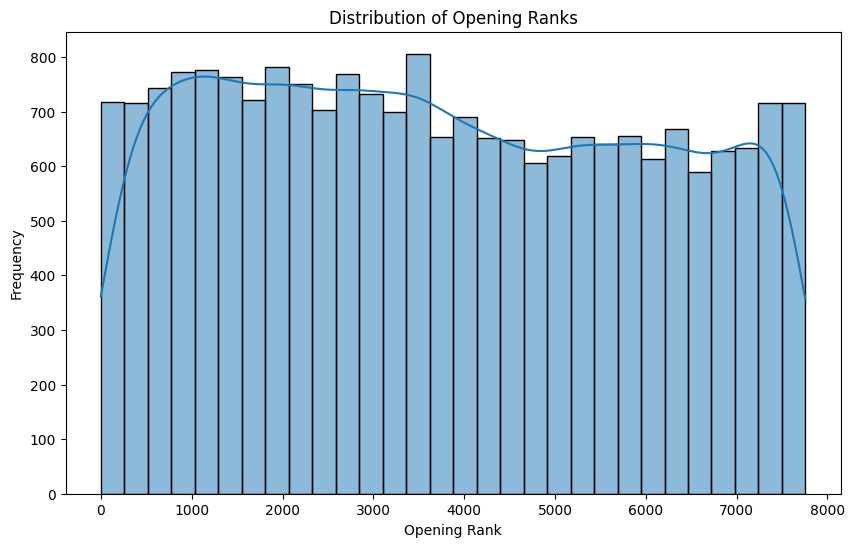

In [9]:
##EDA
plt.figure(figsize=(10, 6))
sns.histplot(data['Opening_Rank'], kde=True, bins=30)
plt.title('Distribution of Opening Ranks')
plt.xlabel('Opening Rank')
plt.ylabel('Frequency')
plt.show()

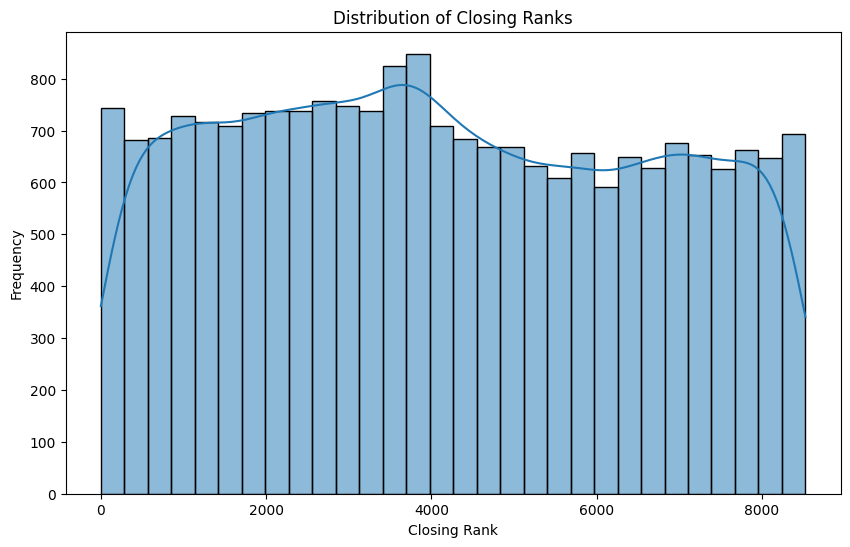

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Closing_Rank'], kde=True, bins=30)
plt.title('Distribution of Closing Ranks')
plt.xlabel('Closing Rank')
plt.ylabel('Frequency')
plt.show()

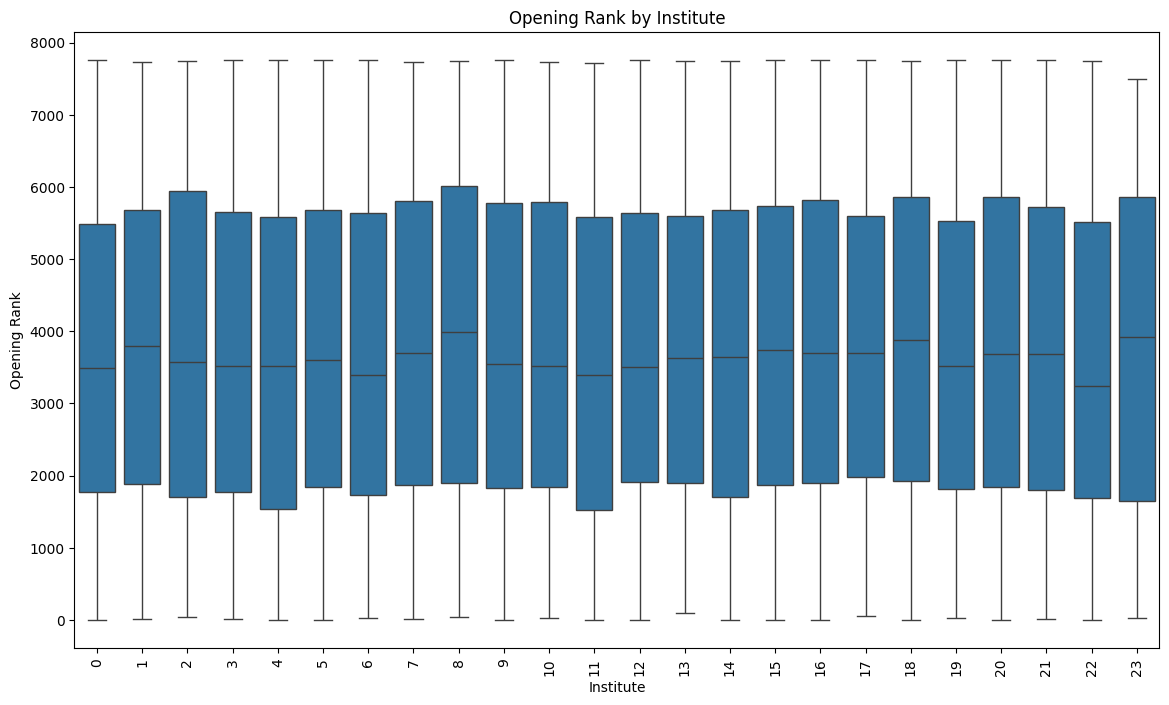

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Institute', y='Opening_Rank', data=data)
plt.xticks(rotation=90)
plt.title('Opening Rank by Institute')
plt.xlabel('Institute')
plt.ylabel('Opening Rank')
plt.show()

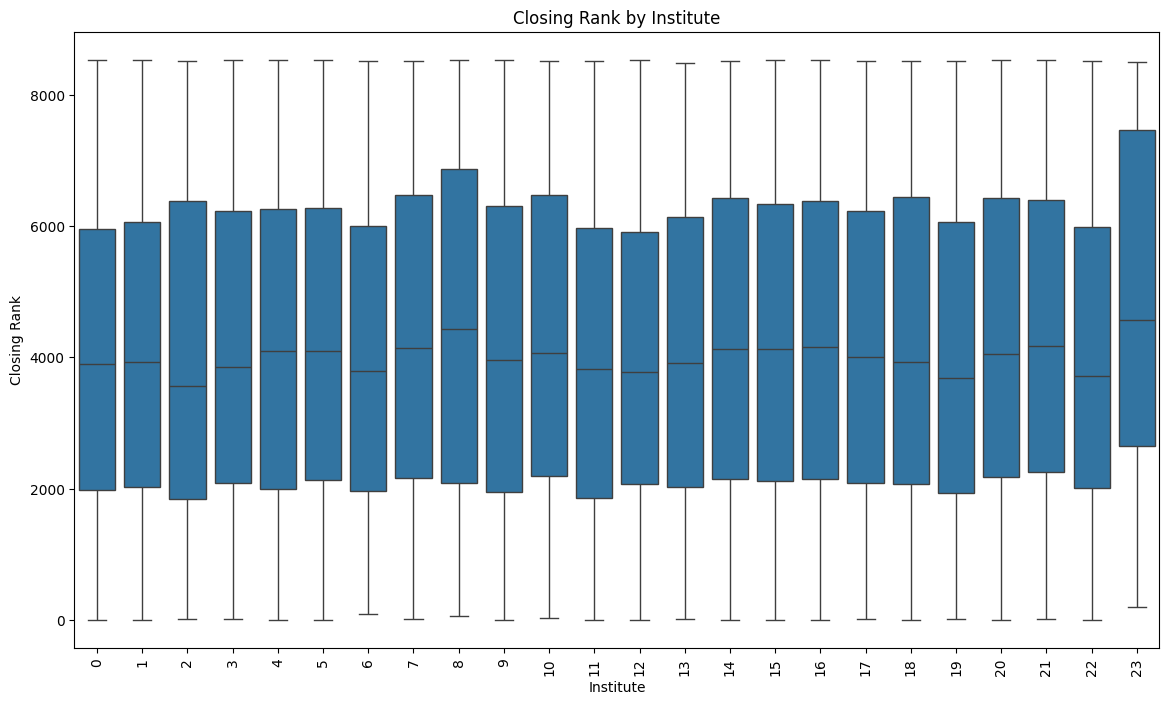

In [12]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Institute', y='Closing_Rank', data=data)
plt.xticks(rotation=90)
plt.title('Closing Rank by Institute')
plt.xlabel('Institute')
plt.ylabel('Closing Rank')
plt.show()

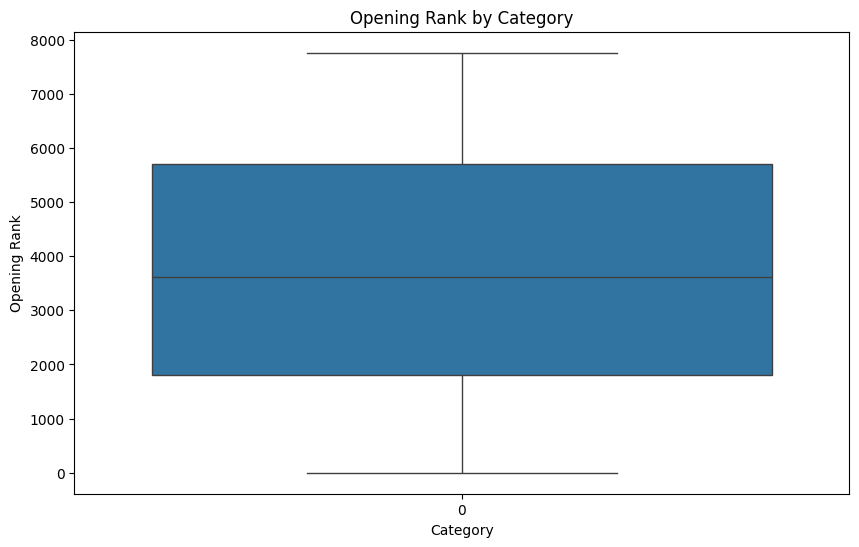

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quota', y='Opening_Rank', data=data)
plt.title('Opening Rank by Category')
plt.xlabel('Category')
plt.ylabel('Opening Rank')
plt.show()

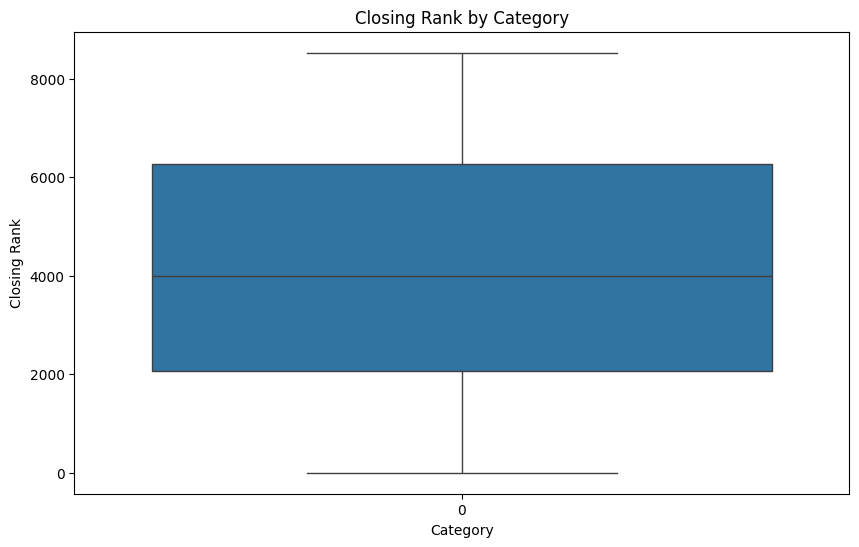

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quota', y='Closing_Rank', data=data)
plt.title('Closing Rank by Category')
plt.xlabel('Category')
plt.ylabel('Closing Rank')
plt.show()


<Figure size 1200x1000 with 0 Axes>

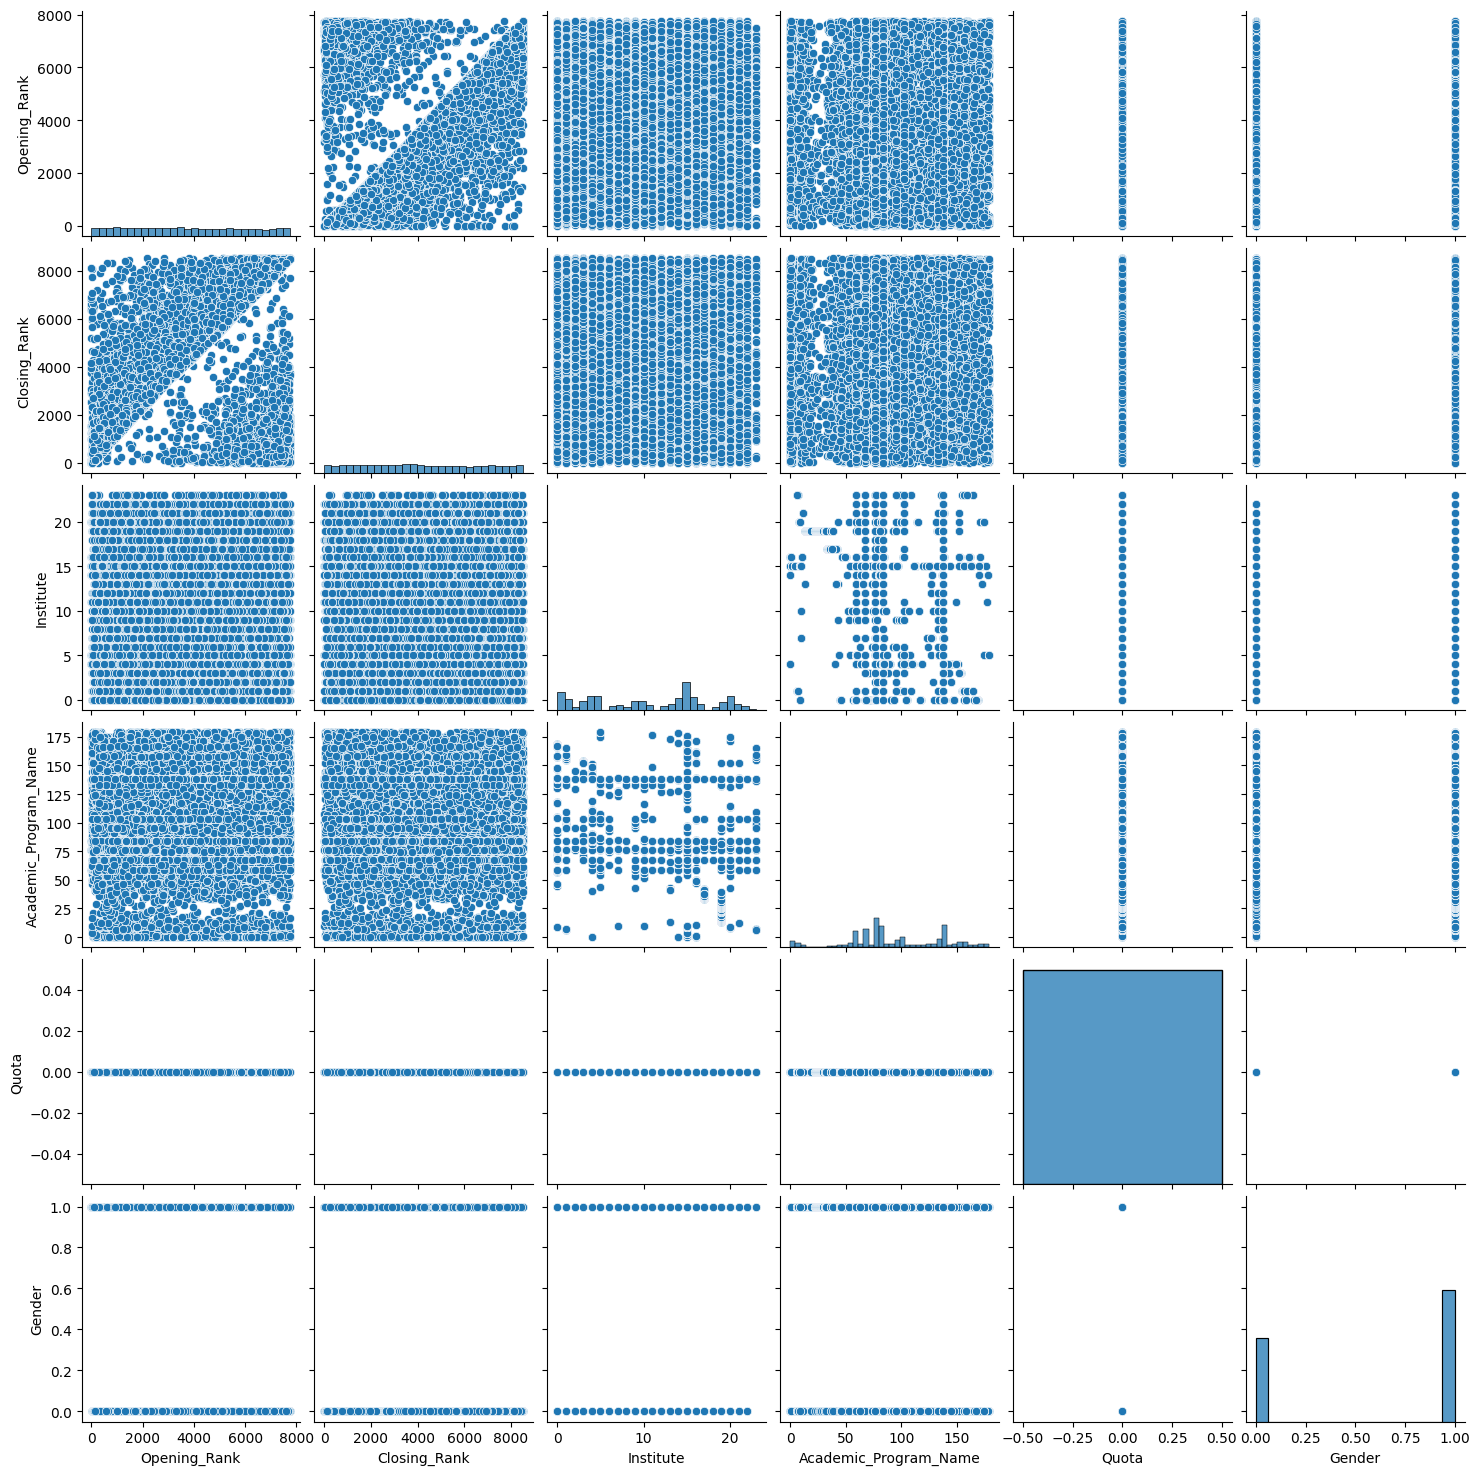

In [15]:
plt.figure(figsize=(12, 10))
sns.pairplot(data[['Opening_Rank', 'Closing_Rank', 'Institute', 'Academic_Program_Name', 'Quota', 'Gender']])
plt.show()

In [16]:
#FEATURE ENGINEERING
#data['rank_difference'] = data['Closing_Rank'] - data['Opening_Rank']
#data['rank_ratio'] = data['Closing_Rank'] / data['Opening_Rank']
features = ['Institute', 'Quota', 'Gender', 'Year', 'Academic_Program_Name', 'Seat_Type']

# Initialize label encoders
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Prepare features and targets
X = data[features]
y_opening = data['Opening_Rank']
y_closing = data['Closing_Rank']

In [17]:
X_train, X_test, y_opening_train, y_opening_test = train_test_split(X, y_opening, test_size=0.2, random_state=42)
X_train, X_test, y_closing_train, y_closing_test = train_test_split(X, y_closing, test_size=0.2, random_state=42)


In [18]:
rf_model_opening = RandomForestRegressor(random_state=42)
rf_model_closing = RandomForestRegressor(random_state=42)


In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_opening = GridSearchCV(estimator=rf_model_opening, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_opening.fit(X_train, y_opening_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [20]:
grid_search_closing = GridSearchCV(estimator=rf_model_closing, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_closing.fit(X_train, y_closing_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [21]:
best_params_opening = grid_search_opening.best_params_
print("Best parameters for opening rank model:", best_params_opening)


Best parameters for opening rank model: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [22]:
best_params_closing = grid_search_closing.best_params_
print("Best parameters for closing rank model:", best_params_closing)


Best parameters for closing rank model: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [23]:
rf_model_opening = RandomForestRegressor(**best_params_opening, random_state=42)
rf_model_opening.fit(X_train, y_opening_train)


RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=300,
                      random_state=42)

In [24]:
rf_model_closing = RandomForestRegressor(**best_params_closing, random_state=42)
rf_model_closing.fit(X_train, y_closing_train)


RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=300,
                      random_state=42)

In [25]:
y_opening_pred = rf_model_opening.predict(X_test)
y_closing_pred = rf_model_closing.predict(X_test)

In [30]:
feature_importances_opening = rf_model_opening.feature_importances_
features = X.columns
indices_opening = np.argsort(feature_importances_opening)

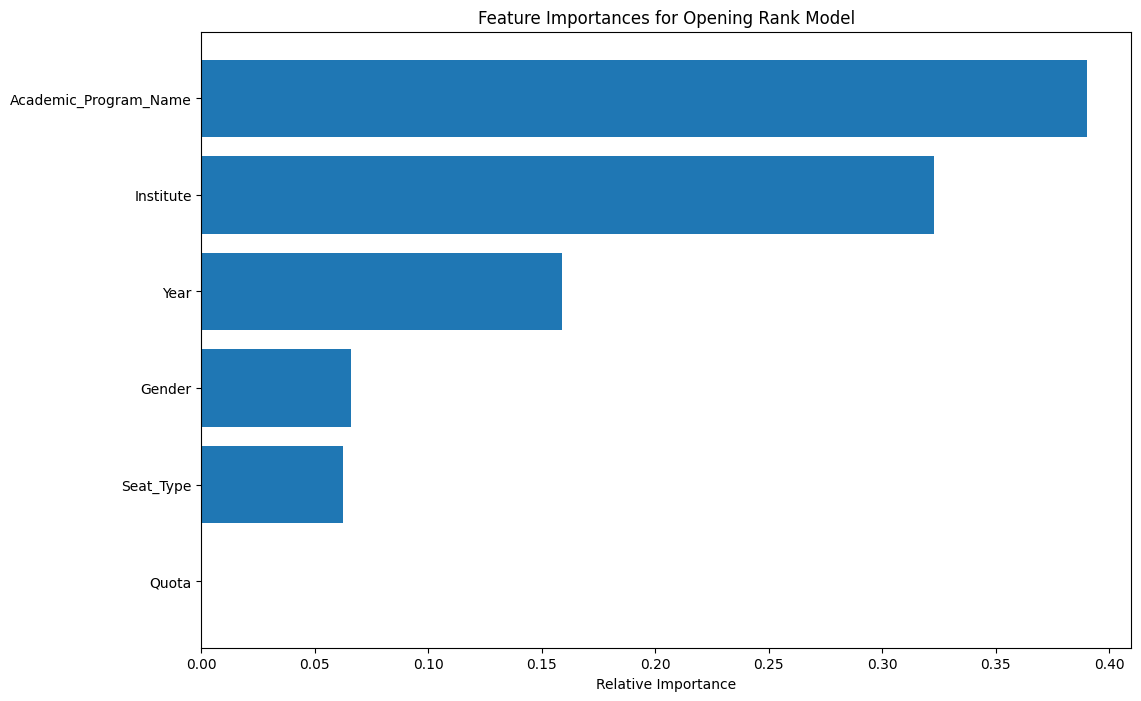

In [31]:
plt.figure(figsize=(12, 8))
plt.title('Feature Importances for Opening Rank Model')
plt.barh(range(len(indices_opening)), feature_importances_opening[indices_opening], align='center')
plt.yticks(range(len(indices_opening)), [features[i] for i in indices_opening])
plt.xlabel('Relative Importance')
plt.show()


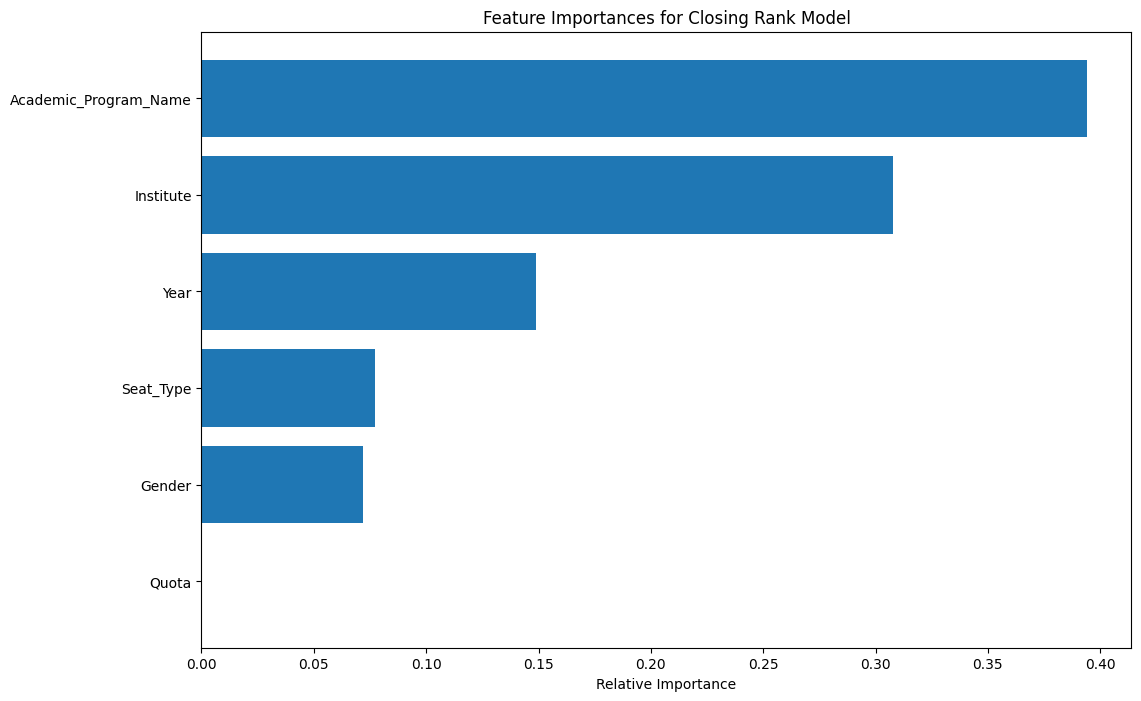

In [32]:
feature_importances_closing = rf_model_closing.feature_importances_
indices_closing = np.argsort(feature_importances_closing)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances for Closing Rank Model')
plt.barh(range(len(indices_closing)), feature_importances_closing[indices_closing], align='center')
plt.yticks(range(len(indices_closing)), [features[i] for i in indices_closing])
plt.xlabel('Relative Importance')
plt.show()

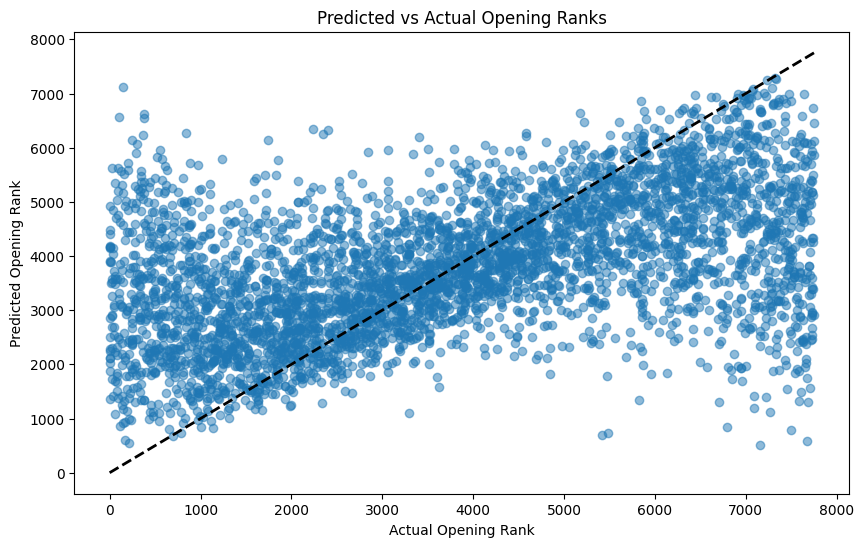

In [33]:
# Predicted vs Actual Opening Ranks
plt.figure(figsize=(10, 6))
plt.scatter(y_opening_test, y_opening_pred, alpha=0.5)
plt.plot([y_opening_test.min(), y_opening_test.max()], [y_opening_test.min(), y_opening_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Opening Ranks')
plt.xlabel('Actual Opening Rank')
plt.ylabel('Predicted Opening Rank')
plt.show()

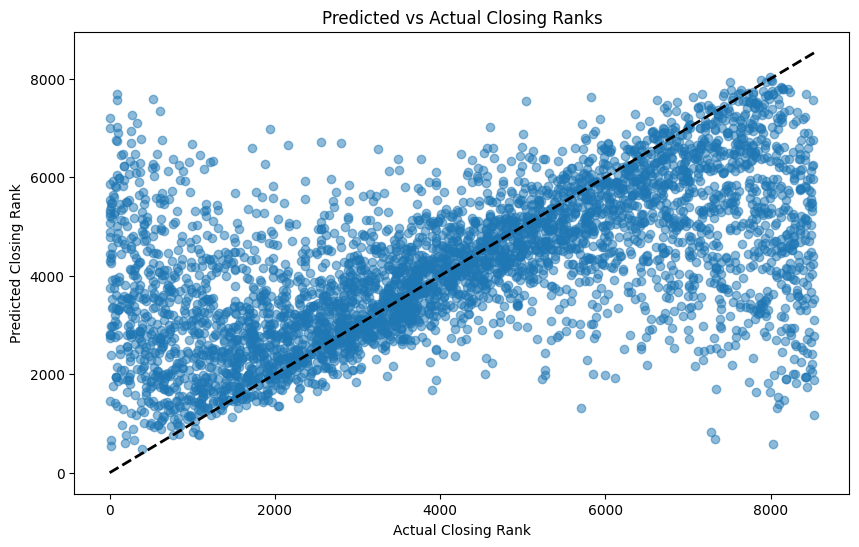

In [34]:
# Predicted vs Actual Closing Ranks
plt.figure(figsize=(10, 6))
plt.scatter(y_closing_test, y_closing_pred, alpha=0.5)
plt.plot([y_closing_test.min(), y_closing_test.max()], [y_closing_test.min(), y_closing_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Closing Ranks')
plt.xlabel('Actual Closing Rank')
plt.ylabel('Predicted Closing Rank')
plt.show()

In [ ]:
pivot_data = data.pivot_table(values='opening_rank', index='institute', columns='gender', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Average Opening Rank by Institute and Gender")
plt.xlabel("gender")
plt.ylabel("Institute")
plt.show()

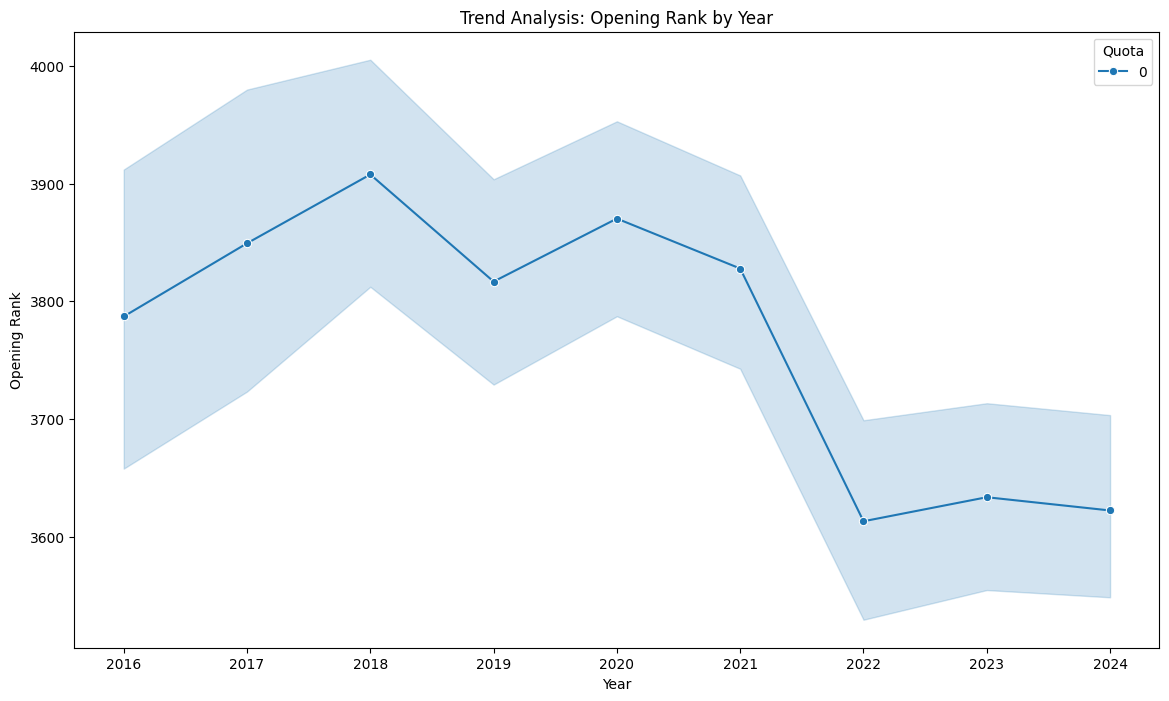

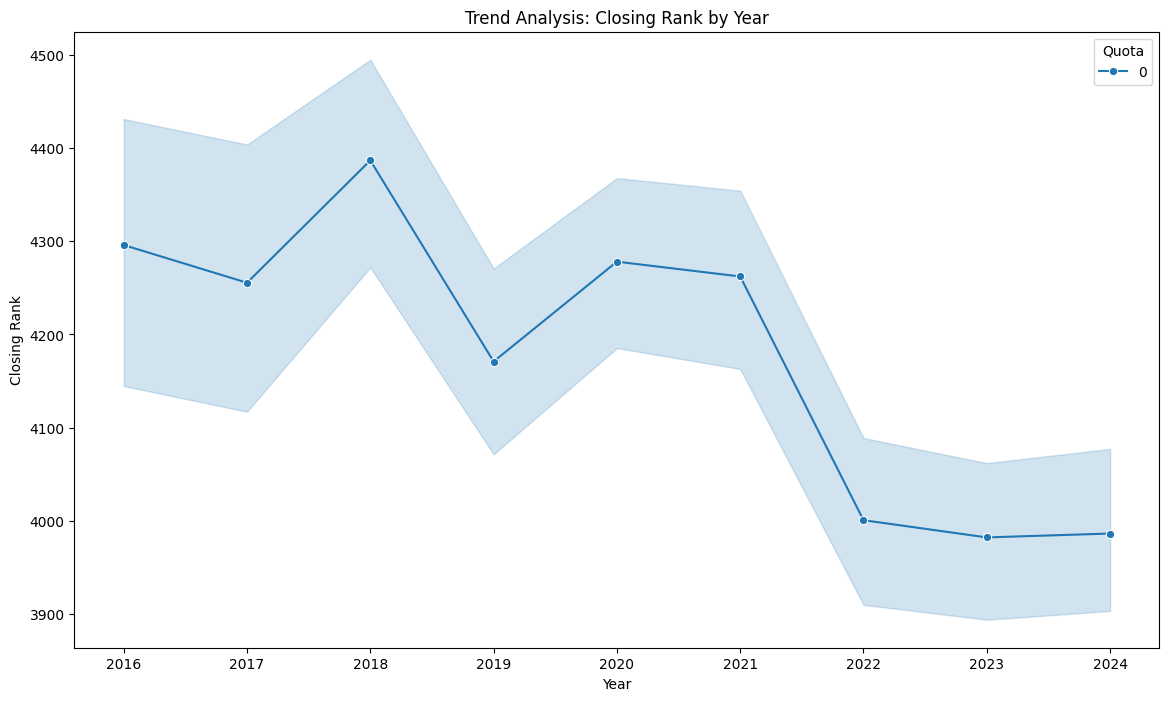

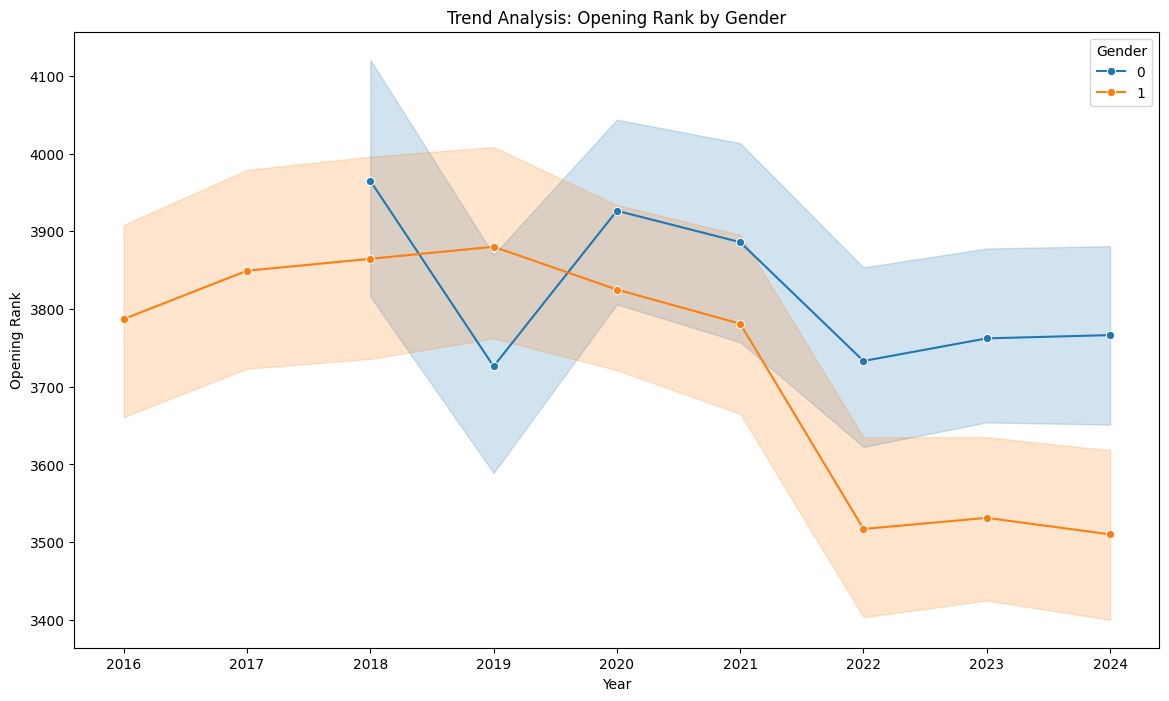

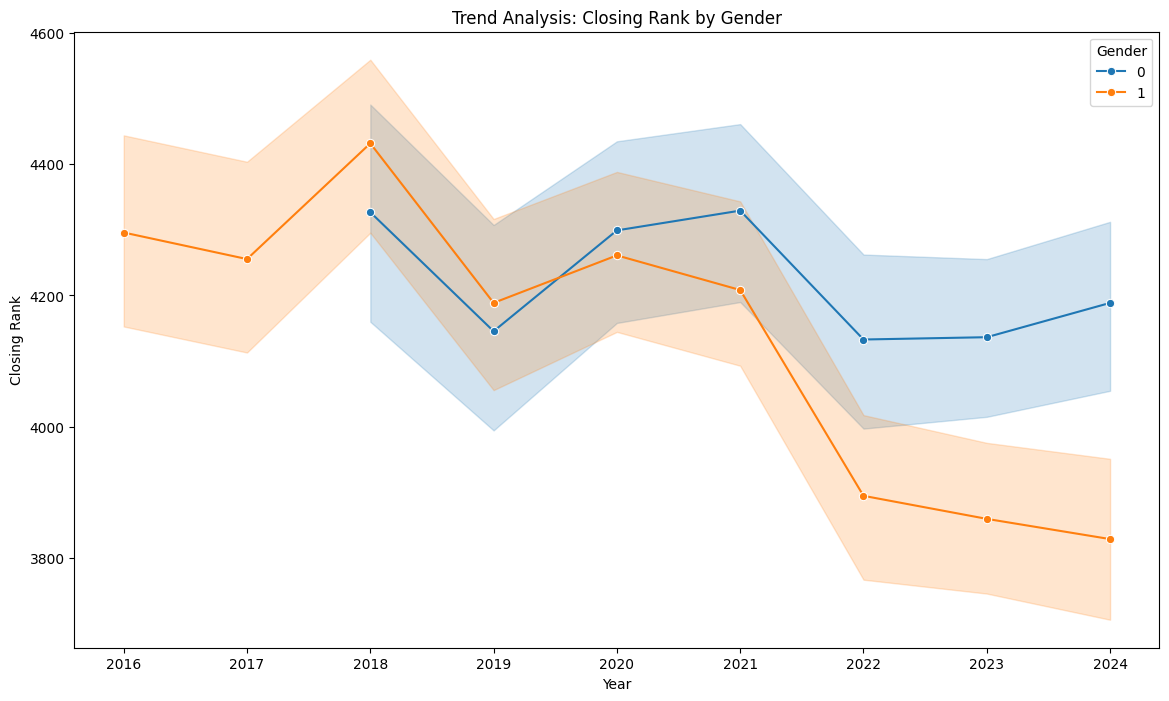

In [35]:
# Trend Analysis: Opening Rank by Year
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Opening_Rank', hue='Quota', data=data, marker='o')
plt.title('Trend Analysis: Opening Rank by Year')
plt.xlabel('Year')
plt.ylabel('Opening Rank')
plt.show()

# Trend Analysis: Closing Rank by Year
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Closing_Rank', hue='Quota', data=data, marker='o')
plt.title('Trend Analysis: Closing Rank by Year')
plt.xlabel('Year')
plt.ylabel('Closing Rank')
plt.show()

# Trend Analysis: Opening Rank by Gender
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Opening_Rank', hue='Gender', data=data, marker='o')
plt.title('Trend Analysis: Opening Rank by Gender')
plt.xlabel('Year')
plt.ylabel('Opening Rank')
plt.show()

# Trend Analysis: Closing Rank by Gender
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Closing_Rank', hue='Gender', data=data, marker='o')
plt.title('Trend Analysis: Closing Rank by Gender')
plt.xlabel('Year')
plt.ylabel('Closing Rank')
plt.show()

In [36]:
import joblib

# Save the trained models using joblib
joblib.dump(rf_model_opening, 'student_performance_model_opening.pkl')
joblib.dump(rf_model_closing, 'student_performance_model_closing.pkl')

# Function to make predictions on new data
def predict_opening_rank(new_data):
    """
    Predict the opening rank for new data using the trained Random Forest model.
    
    Parameters:
    new_data (pd.DataFrame): The new data for which to predict the opening rank.
    
    Returns:
    np.array: The predicted opening ranks.
    """
    # Preprocess new data (ensure it matches the training data format)
    for column in new_data.select_dtypes(include=['object']).columns:
        if column in label_encoders:
            new_data[column] = label_encoders[column].transform(new_data[column])
    
    # Predict using the trained model
    predictions = rf_model_opening.predict(new_data)
    return predictions

def predict_closing_rank(new_data):
    """
    Predict the closing rank for new data using the trained Random Forest model.
    
    Parameters:
    new_data (pd.DataFrame): The new data for which to predict the closing rank.
    
    Returns:
    np.array: The predicted closing ranks.
    """
    # Preprocess new data (ensure it matches the training data format)
    for column in new_data.select_dtypes(include=['object']).columns:
        if column in label_encoders:
            new_data[column] = label_encoders[column].transform(new_data[column])
    
    # Predict using the trained model
    predictions = rf_model_closing.predict(new_data)
    return predictions

In [37]:
# Import required libraries
import pandas as pd
import joblib

# Load the trained models
try:
    rf_model_opening = joblib.load('student_performance_model_opening.pkl')
    rf_model_closing = joblib.load('student_performance_model_closing.pkl')
except Exception as e:
    print(f"Error loading models: {str(e)}")
    
# Sample data
sample_data = {
    'Institute': 4,  
    'Quota': 0,      
    'Gender': 1,     
    'Year': 2016,    
    'Academic_Program_Name': 67,
    'Seat_Type': 3,
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_data])

# Make predictions
try:
    predict_opening_rank = rf_model_opening.predict(sample_df)[0]
    predict_closing_rank = rf_model_closing.predict(sample_df)[0]
    
    print("Predicted Opening Rank:", predict_opening_rank)
    print("Predicted Closing Rank:", predict_closing_rank)
except Exception as e:
    print(f"Error making predictions: {str(e)}")

Predicted Opening Rank: 3117.058070827322
Predicted Closing Rank: 3505.4470122655107
